In [129]:
import numpy as np
import pandas as pd
import urllib.request
import requests
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image, ImageFile
%matplotlib inline

In [2]:
df_georges = pd.read_csv('georges.csv')
df_non_georges = pd.read_csv('non_georges.csv')

In [3]:
df_georges.head()

,https://i.pinimg.com/736x/17/0d/5b/170d5b93d80d247be60f22ca1216bef7.jpg
0,https://i.pinimg.com/736x/47/b9/9a/47b99a2ddcd...
1,https://i.pinimg.com/736x/90/e8/90/90e890f054b...
2,https://i.pinimg.com/736x/0a/71/6f/0a716f6f14e...
3,https://i.pinimg.com/736x/f1/95/be/f195bea0b78...
4,https://i.pinimg.com/736x/78/da/54/78da54b8fa9...


In [4]:
df_non_georges.head()

,https://i.pinimg.com/736x/fd/65/bb/fd65bb679b7975ab73867d62fba2e991.jpg
0,https://i.pinimg.com/736x/78/63/a2/7863a2404af...
1,https://i.pinimg.com/736x/bc/3a/f4/bc3af41444c...
2,https://i.pinimg.com/736x/46/a3/59/46a3595eec7...
3,https://i.pinimg.com/736x/54/b2/ef/54b2ef7af71...
4,https://i.pinimg.com/736x/f6/f6/57/f6f6577d0cb...


In [5]:
print(df_georges.shape)
print(df_non_georges.shape)

(2680, 1)
(3365, 1)


In [6]:
df_georges.isnull().sum()

https://i.pinimg.com/736x/17/0d/5b/170d5b93d80d247be60f22ca1216bef7.jpg    0
dtype: int64

In [7]:
df_non_georges.isnull().sum()

https://i.pinimg.com/736x/fd/65/bb/fd65bb679b7975ab73867d62fba2e991.jpg    0
dtype: int64

In [10]:
root_path = os.getcwd()
folders = ['test', 'train', 'val']
sub_folders = ['georges', 'non_georges']
try:
    for folder in folders:
        for sub_name in sub_folders:
            os.makedirs(os.path.join(folder, sub_name))
except OSError:
    print ("Creation of the directory %s failed" % root_path)
else:
    print ("Successfully created the directory %s" % root_path)

Successfully created the directory C:\Users\kamikaze666\Python_3.7_projects\test_cv_engineer


In [26]:
g_x_train, g_x_test = train_test_split(df_georges, test_size=0.3)
g_x_test, g_x_val = train_test_split(g_x_test, test_size=0.5)

In [27]:
non_x_train, non_x_test = train_test_split(df_non_georges, test_size=0.3)
non_x_test, non_x_val = train_test_split(non_x_test, test_size=0.5)

In [101]:
print(g_x_train.shape)
print(g_x_test.shape)
print(g_x_val.shape)

(1876, 1)
(402, 1)
(402, 1)


In [29]:
print(non_x_train.shape)
print(non_x_test.shape)
print(non_x_val.shape)

(2355, 1)
(505, 1)
(505, 1)


In [23]:
print('{}\{}\{}'.format(root_path, folders[1],sub_folders[0]))

C:\Users\kamikaze666\Python_3.7_projects\test_cv_engineer\train\georges


# Download Georges train, test, val sets

In [6]:
def download_images(dataset, num_folder, num_subfolder):
    folders = ['test', 'train', 'val']
    sub_folders = ['georges', 'non_georges']
    
    for index, row in dataset.iterrows():
        r = requests.get(row[0])
        with open('{}\{}\{}'.format(folders[num_folder],
                                    sub_folders[num_subfolder],
                                    row[0].split('/')[-1]), 'wb') as f:
                                        f.write(r.content)

In [24]:
print('Beginning file download with requests')
for index, row in g_x_train.iterrows():
    r = requests.get(row[0])
    with open('{}\{}\{}'.format(folders[1],sub_folders[0], row[0].split('/')[-1]), 'wb') as f:
        f.write(r.content)

Beginning file download with requests


In [25]:
print('Beginning file download with requests')
for index, row in g_x_test.iterrows():
    r = requests.get(row[0])
    with open('{}\{}\{}'.format(folders[0],sub_folders[0], row[0].split('/')[-1]), 'wb') as f:
        f.write(r.content)

Beginning file download with requests


In [26]:
print('Beginning file download with requests')
for index, row in g_x_val.iterrows():
    r = requests.get(row[0])
    with open('{}\{}\{}'.format(folders[2],sub_folders[0], row[0].split('/')[-1]), 'wb') as f:
        f.write(r.content)

Beginning file download with requests


# Download non Georges train, test, val sets

In [31]:
download_images(non_x_train, 1, 1)

In [29]:
download_images(non_x_test, 0, 1)

In [30]:
download_images(non_x_val, 2, 1)

# Let's see the images

- Выгрузим список из картинок, что есть в папке test/non_georges;
- Выберем одну из картинок и преобразуем её в np.array;

In [118]:
test_nong = os.listdir(path="./test/non_georges/")
for image in test_nong:
    img = Image.open("./test/non_georges/%s" %image).convert('RGB')
    print(image)

001592ee7a76aa8116c99dd35f71b841.jpg
001f59de2a98736af67bd6736872770f.jpg
003d4e46a416fd1ccdc9deb20a079865.jpg
00de0a9376add24248ade9a0364b771d.jpg
015792479c00b4458a5d16c1347195df.jpg
016bbab604ae78960e28220b06615988.jpg
0224684aaf4b46933fbfc22c899a26c7.jpg
024a0c7ae28d84e0d71e80c7e1bdd095.jpg
024dcdc84451b9708b7ff0d4e2bf7e8a.jpg
02c08ff43157c09db9fe4ebe63d28903.jpg
035dccb0e218f9f6fd19f15ab9c7aa1b.jpg
04b726f2f21d6d5eda286ce3deac8643.jpg
05784cdc23349586c3a2490ac85d9442.jpg
0607708bbf20e4ff4ec083091b3e39af.jpg
061e004fdbe8f83a8aaf8394123f1a5f.jpg
063ffa63ed4e70cf3a35a3178102d67c.jpg
06a9c540193794bc250bd4bf77019be8.jpg
076e7c9327c804064172be7de719e822.jpg
07e1df436d2e626293b219aec8ec2f4f.jpg
082a2e1da99b2b02b967ce6cf3b3c971.jpg
08c83864239d5b6bc0a5264bb8020c32.jpg
09811d495e5d783a8a59b218f056c995.jpg
09c9c9289395c45399cb88a8e392dbeb.jpg
09d097cd7573960fd1a14e5e07ce7b5a.jpg
0a1d16739d05cc3add65c8263bc97183.jpg
0bf1b98d7be0184dd7953f2991f51e5d.jpg
0d23478ab8e72bbde29bcca2e96e3d53.jpg
0

71915c7f8b00f1eb0dd7057242955a57.jpg
719a3e64b71a49a1f7f9977d7eb56b51.jpg
7209a3dce50b8c83600e0432d9a98ecb.jpg
73e5dda5b718d3468f080012618228a1.jpg
741f3c75f2804390944b87ca3c0360e0.jpg
7449192eefca8e23ca6bac7d266d3a94.jpg
75bd43e1062750cdc7f0fa691a62246d.jpg
75f27a9dd95baddd62503b4881880981.jpg
76d8928ec105feaea0ae5c59aa0b5329.jpg
77de79492cd6bd71c4599d157a974c30.jpg
78017df4da5ffaf09d0c59172d216426.jpg
78779523e1d78200f7d3dff7ce26ce2f.jpg
791e8a50e046fb78e43632efc7ea8840.jpg
7945f58c0cf752c89c504be95c17e041.jpg
79b7e06f2e64e121903375d2052e4942.jpg
7a40e8ba0a82a6891c3e5fcc6d902033.jpg
7a943651a11314e4e6d23d14b90df7c0.jpg
7ae3cf426482794f084592c03290459b.jpg
7c6b38e5fec5895437abb7e46f360cbe.jpg
7c95d5e57f1b098417e8e1780077d472.jpg
7cc0dce7f62c7a4e471fb20480421cf1.jpg
7d01c74846cfabfb7b92edcb79e68398.jpg
7d0d635fb1558eec5e46f0329b2230e3.jpg
7da976981fefa32694938fc8234d9531.jpg
7e3cc57bb16ccd5777013e0ad8734280.jpg
7e62792f1f6b07912f4a025df63638d3.jpg
7ed3fe6026f6370a603f0a8cb6e36936.jpg
7

e65fe1bb1209dffad0e18ff61f320b85.jpg
e74b6d83c17b35b24ca2d585dcc836b1.jpg
e767e10ae4172be0937495e083854966.jpg
e7c6db62fd92f1569d37f9e3f7921f57.jpg
e8b7823c1df2a0183975847cfed490bf.jpg
e94defa8fc6c5cc21dd8a36d0c8eeda1.jpg
e99a2eee960ab87d8aae9c88eda74be3.jpg
ec3fec9055daf15cebed9a5ca812f899.jpg
f00ba99e839df677f74bca745e553f1a.jpg
f0dc922140e9f743da250feeb7a043c9.jpg
f13de338b505a3c2ccb607b93db96d4c.jpg
f1778bda2a581f61f3964fe0f96a4d61.jpg
f1f1ae14dc24e7adca1d4f70d0e6bdd6.jpg
f215e08c3c3dff8c3b4264534df60545.jpg
f22ca2bda87d5454c224bb50e893ee11.jpg
f25787a3dff82de90246fff8a726f1ef.jpg
f32253cb07c82657419b384157ef04ff.jpg
f356a3be5d7cac22955ff7ede753f7cf.jpg
f393a9516f1c965a344422bf82b49fe7.jpg
f4312ce5178999b7a452e18ded779a76.jpg
f46dfe88bcb56bfc72cace34efcf01fd.jpg
f47e66dded10113fcd5adfa2c1593053.jpg
f51f11460692999ba6382e38bf699636.jpg
f54eaffb6fa989f40797c564bcaebe94.jpg
f555e8faafec2a201e37d0ba4f99a920.jpg
f6370ebd0c8981ea3fe0a5663c045097.jpg
f686be535881132d3e3ab5de150f8a46.jpg
f

In [137]:
image = 'ff8cf13ca9215651bb2ff9bcf754dc43.jpg'
img = Image.open("./test/non_georges/%s" %image)
print(img.format) 
print(img.size) 
print(img.mode)

JPEG
(239, 313)
RGB


In [139]:
numpydata = np.asarray(img) 
print(numpydata.shape)
print(type(numpydata))

(313, 239, 3)
<class 'numpy.ndarray'>


In [140]:
pilImage = Image.fromarray(numpydata) 
print(type(pilImage)) 
  
# Let us check  image details 
print(pilImage.mode) 
print(pilImage.size)

<class 'PIL.Image.Image'>
RGB
(239, 313)


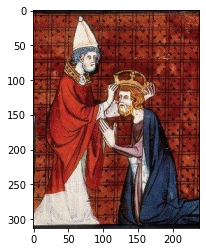

In [142]:
#pilImage.show()
plt.imshow(pilImage)

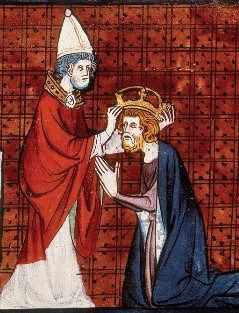

In [141]:
pilImage

In [223]:
mean = np.mean(img, axis=(1,2), keepdims=True)
std = np.std(img, axis=(1,2), keepdims=True)
standardized_images_out = (img - mean) / std

In [224]:
normalized_image_out = (img - np.min(img))/(np.max(img) - np.min(img))

In [211]:
mean.shape

(313, 1, 1)

In [212]:
std.shape

(313, 1, 1)

In [213]:
standardized_images_out.shape

(313, 239, 3)

In [214]:
normalized_image_out.shape

(313, 239, 3)

In [222]:
pilImage = Image.fromarray((normalized_image_out * 255).astype(np.uint8)) 

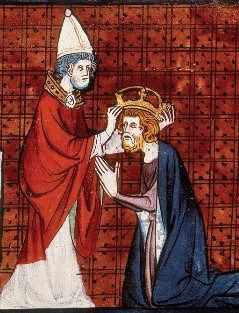

In [216]:
pilImage

In [234]:
image_tensor = torch.Tensor([np.array(img).transpose((2,0,1))])

In [235]:
image_tensor.shape

torch.Size([1, 3, 313, 239])

In [236]:
pf = image_tensor[0].numpy().transpose((1,2,0))

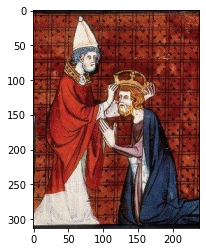

In [237]:
plt.imshow(((pf - pf.min())/(pf.max() - pf.min()))) 

# Standardization

In [250]:
image = 'ff8cf13ca9215651bb2ff9bcf754dc43.jpg'
img = Image.open("./test/non_georges/%s" %image)
pixels = np.asarray(img).astype('float32')

mean, std = pixels.mean(), pixels.std()
print('Mean: %.3f, Standard Deviation: %.3f' % (mean, std))

pixels = (pixels - mean) / std

mean, std = pixels.mean(), pixels.std()
print('Mean: %.3f, Standard Deviation: %.3f' % (mean, std))

Mean: 80.147, Standard Deviation: 67.083
Mean: 0.000, Standard Deviation: 1.000


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


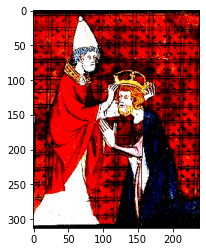

In [251]:
plt.imshow(pixels)

# Normalization

In [242]:
image = 'ff8cf13ca9215651bb2ff9bcf754dc43.jpg'
img = Image.open("./test/non_georges/%s" %image)
pixels = np.asarray(img)

print('Data Type: %s' % pixels.dtype)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

pixels = pixels.astype('float32')

pixels /= 255.0

print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

Data Type: uint8
Min: 0.000, Max: 255.000
Min: 0.000, Max: 1.000


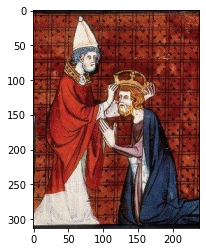

In [244]:
plt.imshow(pixels)

# Simple Net initialization

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data
import torch.nn.functional as F
import torchvision
from torchvision import transforms

ImageFile.LOAD_TRUNCATED_IMAGES=True

In [8]:
def check_image(path):
    try:
        im = Image.open(path)
        return True
    except:
        return False

In [9]:
import sys
print('__Python VERSION:', sys.version)
print('__pyTorch VERSION:', torch.__version__)
print('__GPU: {}'.format(torch.cuda.is_available()))
print('__CUDNN VERSION:', torch.backends.cudnn.version())
print('__CUDNN ENABLE: {}'.format(torch.backends.cudnn.enabled))
print('__Number CUDA Devices:', torch.cuda.device_count())

__Python VERSION: 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
__pyTorch VERSION: 1.7.1
__GPU: True
__CUDNN VERSION: 7604
__CUDNN ENABLE: True
__Number CUDA Devices: 1


In [10]:
img_transforms = transforms.Compose([
                 transforms.Resize((64,64)),    
                 transforms.ToTensor(),
                 transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                       std=[0.229, 0.224, 0.225])])

In [11]:
train_data_path = "./train/"
train_data = torchvision.datasets.ImageFolder(root=train_data_path,transform=img_transforms, is_valid_file=check_image)

val_data_path = "./val/"
val_data = torchvision.datasets.ImageFolder(root=val_data_path,transform=img_transforms, is_valid_file=check_image)

test_data_path = "./test/"
test_data = torchvision.datasets.ImageFolder(root=test_data_path,transform=img_transforms, is_valid_file=check_image)

batch_size=64

train_data_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size)
val_data_loader  = torch.utils.data.DataLoader(val_data, batch_size=batch_size) 
test_data_loader  = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

In [110]:
test_data_path

'./test/'

In [111]:
test_data

Dataset ImageFolder
    Number of datapoints: 893
    Root location: ./test/
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=PIL.Image.BILINEAR)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [12]:
class SimpleNet(nn.Module):

    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(12288, 84)
        self.fc2 = nn.Linear(84, 50)
        self.fc3 = nn.Linear(50,2)
    
    def forward(self, x):
        x = x.view(-1, 12288)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [13]:
simplenet = SimpleNet()

In [ ]:
simplenet.load_state_dict(torch.load("./tmp/simplenet.pth"))

In [14]:
optimizer = optim.Adam(simplenet.parameters(), lr=0.001)

In [15]:
check_image(val_data_path)

False

In [16]:
if torch.cuda.is_available():
    device = torch.device("cuda") 
else:
    device = torch.device("cpu")

simplenet.to(device)

SimpleNet(
  (fc1): Linear(in_features=12288, out_features=84, bias=True)
  (fc2): Linear(in_features=84, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=2, bias=True)
)

In [17]:
def train(model, optimizer, loss_fn, train_loader, val_loader, epochs=20, device="cpu"):
    for epoch in range(1, epochs+1):
        training_loss = 0.0
        valid_loss = 0.0
        model.train()
        for batch in train_loader:
            optimizer.zero_grad()
            inputs, targets = batch
            inputs = inputs.to(device)
            targets = targets.to(device)
            output = model(inputs)
            loss = loss_fn(output, targets)
            loss.backward()
            optimizer.step()
            training_loss += loss.data.item() * inputs.size(0)
        training_loss /= len(train_loader.dataset)
        
        model.eval()
        num_correct = 0 
        num_examples = 0
        for batch in val_loader:
            inputs, targets = batch
            inputs = inputs.to(device)
            output = model(inputs)
            targets = targets.to(device)
            loss = loss_fn(output,targets) 
            valid_loss += loss.data.item() * inputs.size(0)
            correct = torch.eq(torch.max(F.softmax(output, dim=1), dim=1)[1], targets)
            num_correct += torch.sum(correct).item()
            num_examples += correct.shape[0]
        valid_loss /= len(val_loader.dataset)

        print('Epoch: {}, Training Loss: {:.2f}, Validation Loss: {:.2f}, accuracy = {:.2f}'.format(epoch, training_loss,
        valid_loss, num_correct / num_examples))

In [40]:
train(simplenet, optimizer,torch.nn.CrossEntropyLoss(), train_data_loader,val_data_loader, epochs=15, device=device)

Epoch: 1, Training Loss: 0.49, Validation Loss: 0.61, accuracy = 0.70
Epoch: 2, Training Loss: 0.47, Validation Loss: 0.64, accuracy = 0.70
Epoch: 3, Training Loss: 0.48, Validation Loss: 0.62, accuracy = 0.70
Epoch: 4, Training Loss: 0.47, Validation Loss: 0.62, accuracy = 0.70
Epoch: 5, Training Loss: 0.47, Validation Loss: 0.65, accuracy = 0.70
Epoch: 6, Training Loss: 0.45, Validation Loss: 1.82, accuracy = 0.69
Epoch: 7, Training Loss: 0.58, Validation Loss: 0.94, accuracy = 0.70
Epoch: 8, Training Loss: 0.51, Validation Loss: 0.66, accuracy = 0.69
Epoch: 9, Training Loss: 0.46, Validation Loss: 0.64, accuracy = 0.70
Epoch: 10, Training Loss: 0.46, Validation Loss: 0.65, accuracy = 0.71
Epoch: 11, Training Loss: 0.45, Validation Loss: 0.65, accuracy = 0.72
Epoch: 12, Training Loss: 0.44, Validation Loss: 0.72, accuracy = 0.72
Epoch: 13, Training Loss: 0.45, Validation Loss: 0.64, accuracy = 0.72
Epoch: 14, Training Loss: 0.43, Validation Loss: 0.69, accuracy = 0.72
Epoch: 15, Trai

In [41]:
torch.save(simplenet.state_dict(), os.path.join("./tmp", "simplenet.pth"))

In [87]:
labels = ['georges','non_georges']
simplenet.eval()    
img = Image.open("./test/georges/5caebdce287c8f59245e4a1d8d36953e.jpg").convert('RGB') 
img = img_transforms(img).to(device)


prediction = F.softmax(simplenet(img), dim=1)
prediction = prediction.argmax()
print(labels[prediction])

non_georges


In [102]:
labels = ['georges','non_georges']
test_g_final = os.listdir(path="./test/georges/")
estimate = []
simplenet.eval()
for image in test_g_final:
    img = Image.open("./test/georges/%s" %image).convert('RGB')
    img = img_transforms(img).to(device)
    
    prediction = F.softmax(simplenet(img), dim=1)
    prediction = prediction.argmax()
    estimate.append(labels[prediction])

In [103]:
df_g_predict = pd.DataFrame(list(zip(test_g_final, estimate)), 
               columns =['georges', 'prediction']) 

In [95]:
labels = ['georges','non_georges']
test_non_final = os.listdir(path="./test/non_georges/")
estimate_non = []
simplenet.eval()
for image in test_non_final:
    img = Image.open("./test/non_georges/%s" %image).convert('RGB')
    img = img_transforms(img).to(device)
    
    prediction = F.softmax(simplenet(img), dim=1)
    prediction = prediction.argmax()
    estimate_non.append(labels[prediction])

In [96]:
df_nong_predict = pd.DataFrame(list(zip(test_non_final, estimate_non)), 
               columns =['non_georges', 'prediction']) 

In [114]:
df_g_predict.head()

,georges,prediction
0,0170c0b56f8e4726aba50cfd7bf22ec1.jpg,non_georges
1,01dcea291ddc7ce0fd04d17c9007198a.jpg,georges
2,0227e870d7b32b2b7b6139ec0ab28217.jpg,non_georges
3,02753a3c69470ff38c36e9115a0d218a.jpg,georges
4,02a62272caeadb26d626f3eb55f8802d.jpg,georges


In [112]:
print((df_g_predict['prediction'] == 'non_georges').sum(), '-- не Георгиев')
print((df_g_predict['prediction'] == 'georges').sum(), '-- Георгиев')

247 -- не Георгиев
141 -- Георгиев


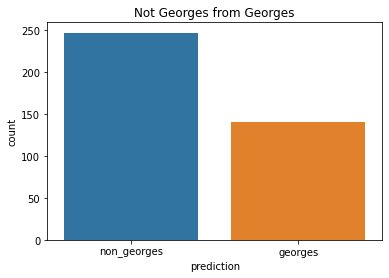

In [113]:
fig , ax = plt.subplots(figsize=(6,4))
sns.countplot(x='prediction', data=df_g_predict)
plt.title("Not Georges from Georges")
plt.show()

In [115]:
df_nong_predict.head()

,non_georges,prediction
0,001592ee7a76aa8116c99dd35f71b841.jpg,non_georges
1,001f59de2a98736af67bd6736872770f.jpg,non_georges
2,003d4e46a416fd1ccdc9deb20a079865.jpg,non_georges
3,00de0a9376add24248ade9a0364b771d.jpg,non_georges
4,015792479c00b4458a5d16c1347195df.jpg,non_georges


In [106]:
print((df_nong_predict['prediction'] == 'non_georges').sum(), '-- не Георгиев')
print((df_nong_predict['prediction'] == 'georges').sum(), '-- Георгиев')

472 -- не Георгиев
33 -- Георгиев


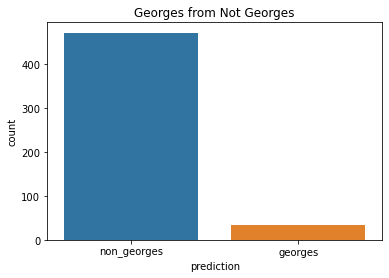

In [109]:
fig , ax = plt.subplots(figsize=(6,4))
sns.countplot(x='prediction', data=df_nong_predict)
plt.title("Georges from Not Georges")
plt.show()